# COVID19 Xray Images Prediction Using CNN Model

### Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Dataset

In [ ]:
epochs = 200
batch_size = 32

# Load images
train_datagen = ImageDataGenerator(rescale=1/255,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    directory='Data/covid-radiology-dataset/train/',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='training')

validation_gen = train_datagen.flow_from_directory(
    directory='Data/covid-radiology-dataset/train/',
    target_size=(299, 299),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation')

test_datagen = ImageDataGenerator(rescale=1/255)

test_gen = test_datagen.flow_from_directory(directory='Data/covid-radiology-dataset/test/', 
                                              target_size=(299, 299),
                                              class_mode='binary',
                                              shuffle=True,
                                              batch_size=batch_size, 
                                              color_mode='grayscale')

Found 8800 images belonging to 2 classes.
Found 2200 images belonging to 2 classes.
Found 2807 images belonging to 2 classes.


### Model

In [ ]:
# Callbacks
class MyCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        print(logs.get('accuracy'))
        if(logs.get('accuracy') > 0.98):
            self.model.stop_training = True

In [ ]:
# create model
model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_gen,
          steps_per_epoch=8,
          epochs=epochs,
          verbose=2,
          validation_data=validation_gen,
          validation_steps=8,
          callbacks=[MyCallback()])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 297, 297, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 33, 33, 128)      

## Evaluate the Model on Test Data

In [ ]:
print("Evaluate on test data")
evalution_results = model.evaluate(test_gen, batch_size=128, verbose=2)
print("test loss, test acc:", evalution_results)

Evaluate on test data
88/88 - 9s - loss: 0.1443 - accuracy: 0.9412
test loss, test acc: [0.14428630471229553, 0.941218376159668]


## Visualizations

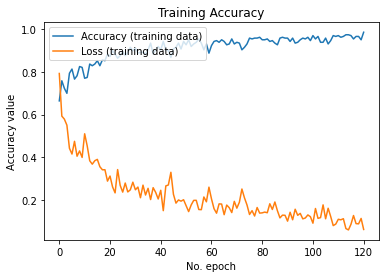

In [ ]:
plt.plot(history.history['accuracy'], label='Accuracy (training data)')
plt.plot(history.history['loss'], label='Loss (training data)')
plt.title('Training Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

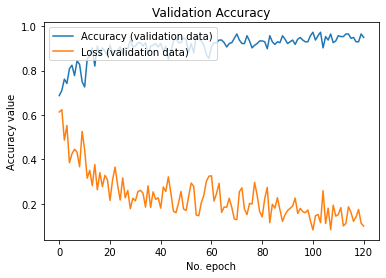

In [ ]:
plt.plot(history.history['val_accuracy'], label='Accuracy (validation data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Validation Accuracy')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()